<a href="https://colab.research.google.com/github/Nagasrineelamshetty/AIML/blob/main/assignment(aimlmodule1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) What if we use text from another source than Wikipedia?

In [ ]:
import requests

# Topics and API key
topics = ["Climate Change", "Artificial Intelligence"]
languages = ["en", "fr"]
api_key = "YOUR_API_KEY"  # Replace with your NewsAPI key
base_url = "https://newsapi.org/v2/everything"

# Function to fetch articles
def fetch_articles(topic, lang):
    response = requests.get(base_url, params={"q": topic, "language": lang, "apiKey": api_key})
    articles = response.json().get("articles", [])
    return "\n".join([a.get("content", "") for a in articles if a.get("content")])

# Fetch content
data = {
    f"{lang}_{topic}": fetch_articles(topic, lang)
    for lang in languages for topic in topics
}

# Print previews
for key, content in data.items():
    print(f"{key} Content:", content[:500])


en_Climate Change Content: 
en_Artificial Intelligence Content: 
fr_Climate Change Content: 
fr_Artificial Intelligence Content: 


2)How can we use and visualize trigrams and higher n-grams?

o use and visualize trigrams (or higher n-grams), we can first generate them from text by tokenizing it and grouping consecutive tokens into sets of three (or more). Using Python's NLTK library, this is straightforward. For example, we can tokenize a text, generate trigrams, and count their frequencies. Once we have the frequencies, we can visualize the most common trigrams using a bar chart or a word cloud. Here's a simple example:

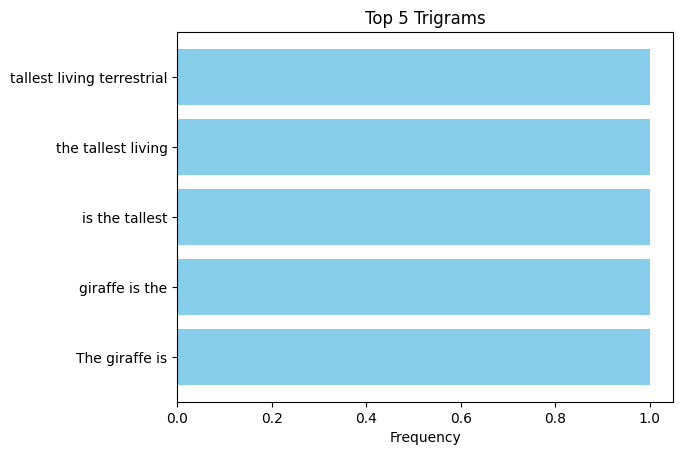

In [ ]:
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Sample text
text = "The giraffe is the tallest living terrestrial animal."

# Tokenize and generate trigrams
tokens = text.split()
trigrams = list(ngrams(tokens, 3))

# Count trigram frequencies
trigram_counts = Counter(trigrams)

# Plot the top 5 trigrams
top_trigrams = trigram_counts.most_common(5)
labels = [" ".join(trigram) for trigram, _ in top_trigrams]
values = [freq for _, freq in top_trigrams]

plt.barh(labels, values, color="skyblue")
plt.xlabel("Frequency")
plt.title("Top 5 Trigrams")
plt.show()


3) Which is the best combination of features?
The best combination depends on the type of data and the classification task. Here's how these features might be evaluated:

Sum: Represents an aggregate property (e.g., pixel intensities in an image).
Hull: Represents the convex hull, which captures the outer boundary of a shape.
Hole: Represents the number or size of enclosed spaces within a shape.
Boundary: Represents the perimeter or edge details of the shape.
To determine the best combination:

Use feature importance metrics from models like Random Forest or Gradient Boosting to identify which features contribute most.
Perform Principal Component Analysis (PCA) to explore if these features, combined, explain significant variance.

4) How would you test or visualize four or more features?
Testing:

Train a classifier (e.g., SVM, Random Forest) using these features and evaluate performance using metrics like accuracy or F1-score.
Perform feature selection by testing models with subsets of these features to identify the best-performing combination.
Visualization:

Use pairwise scatter plots to explore relationships between features.
For four features, use 3D plots with the fourth feature as color coding, or apply t-SNE to reduce dimensionality for visualization.

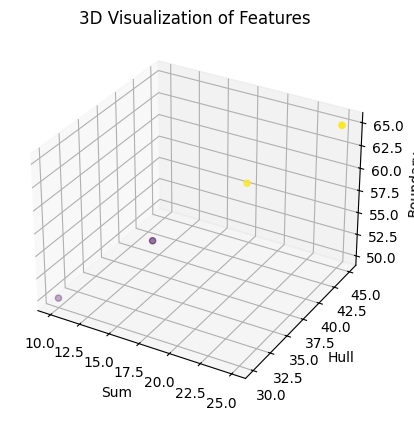

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Example data
data = pd.DataFrame({
    "Sum": [10, 20, 15, 25],
    "Hull": [30, 40, 35, 45],
    "Hole": [2, 0, 1, 0],
    "Boundary": [50, 60, 55, 65],
    "Class": [0, 1, 0, 1]
})

# 3D plot for visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Sum"], data["Hull"], data["Boundary"], c=data["Class"], cmap="viridis")
ax.set_xlabel("Sum")
ax.set_ylabel("Hull")
ax.set_zlabel("Boundary")
plt.title("3D Visualization of Features")
plt.show()


5) Can you come up with your own features?

Yes, new features can be derived from sum, hull, hole, and boundary to enhance classification:

Compactness:
Compactness=(Boundary^2)/Hull area

Useful for distinguishing compact shapes (like circles) from elongated ones.

Density:
Density=Sum/Hull area

Measures how "filled" a shape is.

Hole-to-Hull Ratio:

Hole-to-Hull Ratio=Hole count/Hull area


Highlights shapes with many small voids (e.g., perforated objects).

6) Will these features work for different classes other than 0 and 1?
Yes, these features can generalize to multiple classes. For instance:

Boundary might distinguish between jagged edges (e.g., leaves) and smooth edges (e.g., circles).
Hole can differentiate objects like doughnuts (one hole) vs. rings (multiple holes).
Use a multi-class classifier like Random Forest, Support Vector Machines, or Neural Networks.

7) What will happen if we take more than two classes at a time?
If there are more than two classes:

Model Complexity: Multi-class classification increases computational requirements and complexity.

Performance Metrics: Evaluate the model using macro-averaged precision, recall, or F1-score to ensure fair performance across all classes.

Feature Interaction: More classes might reveal new patterns in feature interactions, requiring feature engineering or selection.

Visualization can also become challenging. t-SNE or UMAP can help project high-dimensional data into 2D or 3D for better interpretability.



In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Example data
data = pd.DataFrame({
    "Sum": [10, 20, 15, 25, 18, 22],
    "Hull": [30, 40, 35, 45, 38, 42],
    "Hole": [2, 0, 1, 0, 1, 2],
    "Boundary": [50, 60, 55, 65, 58, 62],
    "Class": [0, 1, 2, 0, 2, 1]
})

# Train-test split
X = data[["Sum", "Hull", "Hole", "Boundary"]]
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)  # Adding random_state for reproducibility
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_